# Summarize Group Performance 
---------------------
- Desc: Summary statistics for online study
- Author:  G.FragaGonzalez



# Gather individual stats
## Import libraries and define paths
Use location of this file to define relative paths

In [1]:
from datetime import date
today = date.today()
print("Today's date:", today)
import sys
import os
import glob
import re
import pandas as pd
import numpy as np

import plotly.express as px #conda install -c plotly plotly
#conda install -c conda-forge itables
from itables import init_notebook_mode, show

# filepaths - Use current script path as reference 
thisScriptDir = os.path.dirname(os.path.abspath("__file__"))
baseDir = thisScriptDir[:thisScriptDir.find("Scripts")]
dirinput = os.path.join(baseDir + 'Analysis','pilot_2')
diroutput = os.path.join(baseDir + 'Analysis','pilot_2')


Today's date: 2023-11-05


## Read concatenated file

In [2]:
# find relevant files (Files have a number id before the extension. This is used in the reg exp matching)
fileinput = os.path.join(dirinput, "Gathered_summary_long.csv")

df = pd.read_csv(fileinput)  
df['percTrials'] = df['propTrials'] * 100
         
print('Read table with dimensions ', df.shape)
df.columns

Read table with dimensions  (4740, 11)


Index(['SubjectID', 'task', 'block', 'TYPE', 'LV', 'Correctness', 'count',
       'propTrials', 'RT_mean', 'RT_std', 'percTrials'],
      dtype='object')

## Descriptive statistics

### Tables 

In [3]:
init_notebook_mode(all_interactive=True)

stats = df.groupby(['task','TYPE','block','LV','Correctness'])[['percTrials','RT_mean']].agg(['mean', 'std'])
stats.columns = [f'{col[0]}_{col[1]}' for col in stats.columns]
stats = stats.reset_index()

show(stats, column_filters="footer", dom="lrtip", lengthMenu=[ 10,20,50])

<IPython.core.display.Javascript object>

### Figures

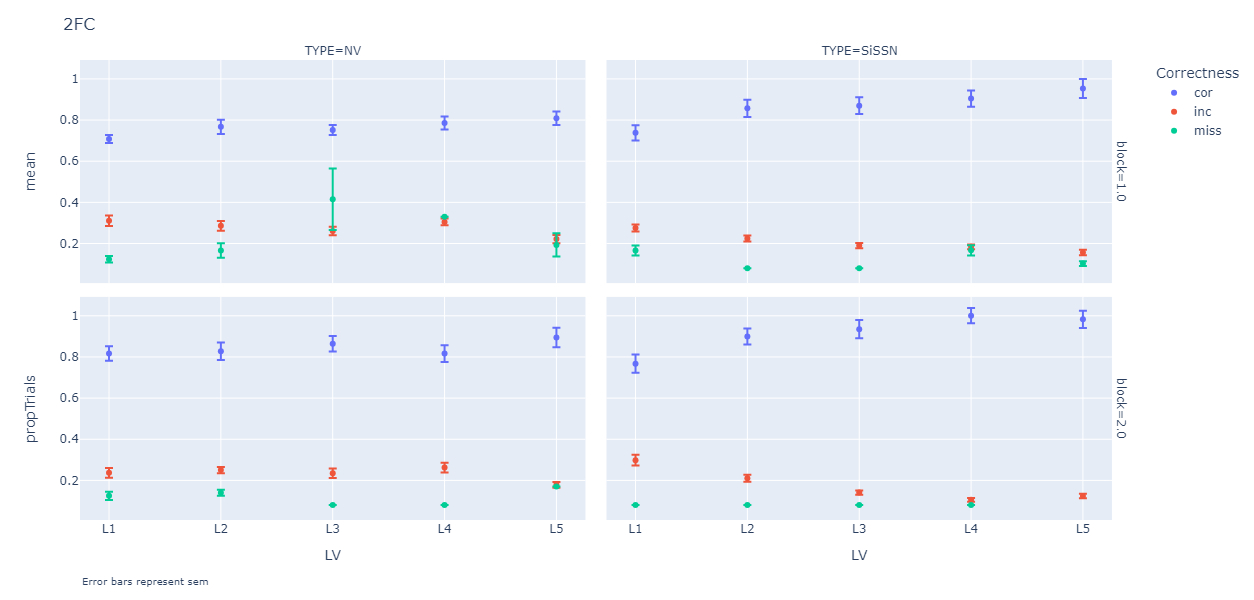

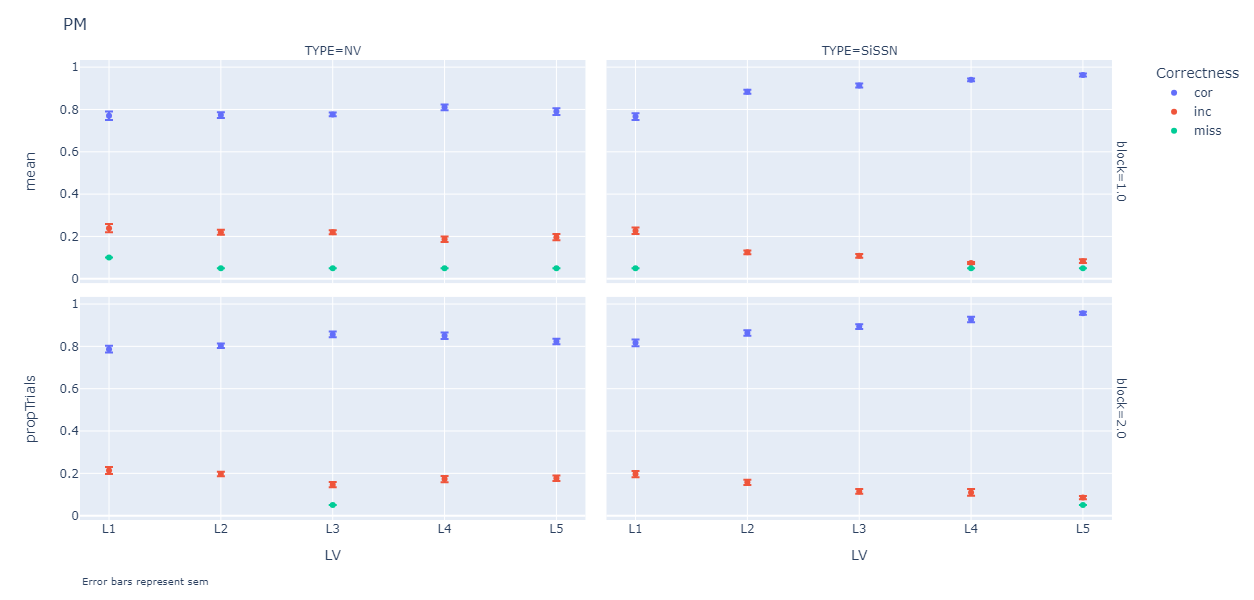

In [9]:
# Define a function to create the plot with error bars and title
def create_scatter_plot(df, task_name):
    # Calculate stats
    depvar = 'propTrials' 
    #agg_df = df[df['Correctness'].groupby(['task','TYPE', 'block', 'LV','Correctness'])[depvar].agg(['mean', 'std', 'sem']).reset_index()
    agg_df = df.groupby(['task','TYPE', 'block', 'LV','Correctness'])[depvar].agg(['mean', 'std', 'sem']).reset_index()
    # Define which type of error bars to use
    ebars = "sem"

    # Create a scatter plot with error bars
    fig = px.scatter(
        agg_df, 
        x="LV", 
        y="mean", 
        color="Correctness", 
        facet_col="TYPE", 
        facet_row="block",
        error_x=ebars, 
        error_y=ebars
    )

    # Update layout for larger figure and add title
    fig.update_layout(
        xaxis_title='LV',
        yaxis_title=depvar,
        height=600,  # Set the height
        width=800,    # Set the width
        title=f'{task_name}'  # Add title
    )

    # Add footnote
    fig.add_annotation(
        text="Error bars represent " + ebars,
        xref="paper", yref="paper",
        x=0, y=-0.15,
        showarrow=False,
        font=dict(size=10)
    )

    return fig

# Filter data for Task A and create plot with title
task_a_df = df[df['task'] == '2FC']
fig_task_a = create_scatter_plot(task_a_df, '2FC')
fig_task_a.show()

# Filter data for Task B and create plot with title
task_b_df = df[df['task'] == 'PM']
fig_task_b = create_scatter_plot(task_b_df, 'PM')
fig_task_b.show()


In [ ]:
merged blocks

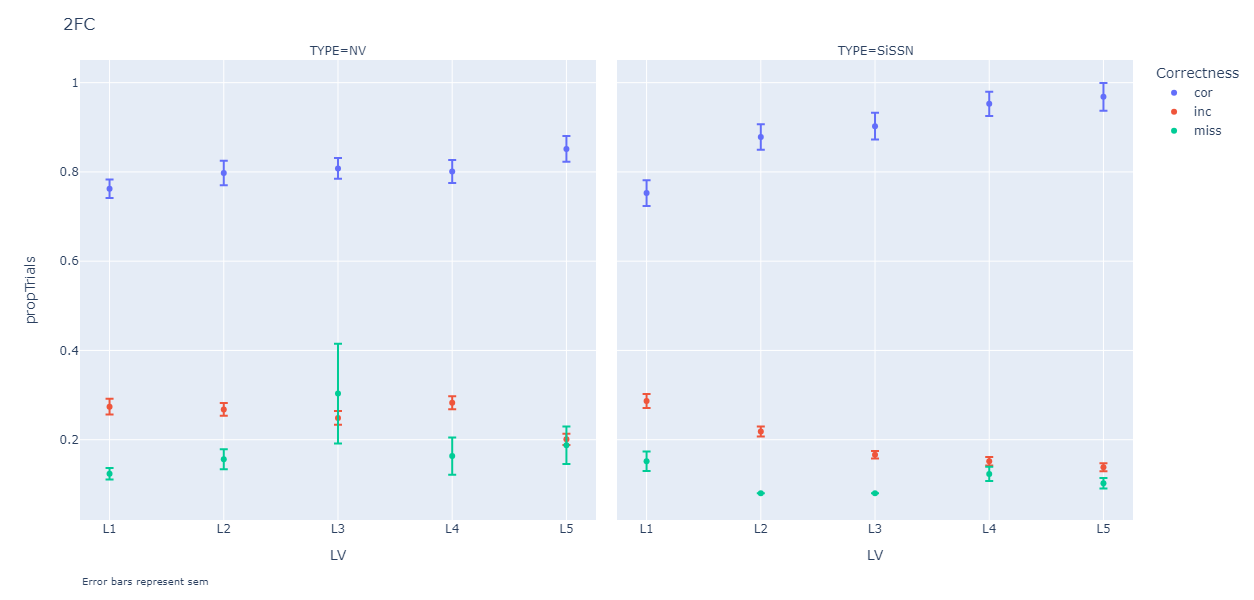

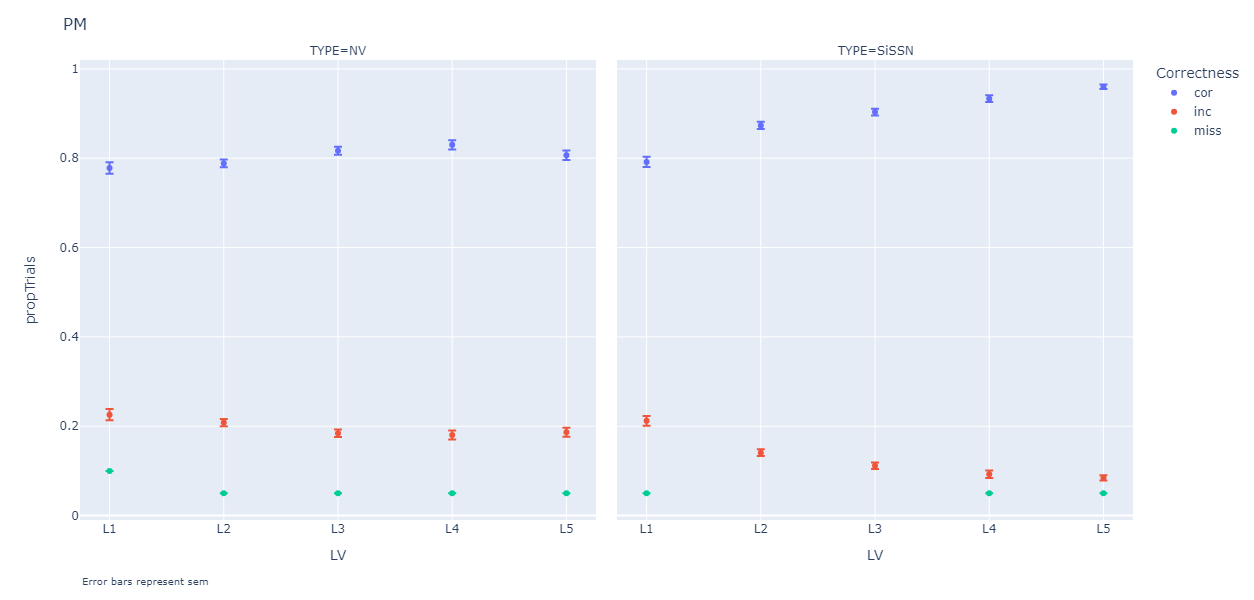

In [8]:
# Define a function to create the plot with error bars and title
def create_scatter_plot(df, task_name):
    # Calculate stats
    depvar = 'propTrials' 
    agg_df = df.groupby(['task','TYPE', 'LV','Correctness'])[depvar].agg(['mean', 'std', 'sem']).reset_index()
    # Define which type of error bars to use
    ebars = "sem"

    # Create a scatter plot with error bars
    fig = px.scatter(
        agg_df, 
        x="LV", 
        y="mean", 
        color="Correctness", 
        facet_col="TYPE", 
        #facet_row="block",
        error_x=ebars, 
        error_y=ebars
    )

    # Update layout for larger figure and add title
    fig.update_layout(
        xaxis_title='LV',
        yaxis_title=depvar,
        height=600,  # Set the height
        width=800,    # Set the width
        title=f'{task_name}'  # Add title
    )

    # Add footnote
    fig.add_annotation(
        text="Error bars represent " + ebars,
        xref="paper", yref="paper",
        x=0, y=-0.15,
        showarrow=False,
        font=dict(size=10)
    )

    return fig

# Filter data for Task A and create plot with title
task_a_df = df[df['task'] == '2FC']
fig_task_a = create_scatter_plot(task_a_df, '2FC')
fig_task_a.show()

# Filter data for Task B and create plot with title
task_b_df = df[df['task'] == 'PM']
fig_task_b = create_scatter_plot(task_b_df, 'PM')
fig_task_b.show()
